In [5]:
import openai
from openai import OpenAI
import os
from dotenv import load_dotenv
import matplotlib.pyplot as plt
import ast
from pathlib import Path

In [8]:
# Specify the path to the .env file
env_path = Path(r'C:\Users\CrazyFlie\Documents\Nonuploadable_Git\.env')

# Load the .env file
load_dotenv(dotenv_path=env_path)

# Get the OpenAI API key from environment variables
api_key = os.getenv("OPENAI_API_KEY")

client = OpenAI(
    api_key=api_key
)

In [9]:

prompt1 = """
You are provided with a set of Lego blocks that are rectangular.
You are asked to build the letter 'E" on an 8 by 8 gird.
Each block occupies a segment [(x, y), (x, y)] that can extend only in 1 unit either horizontal or vertical. 
For example, [(0, 0), (0, 1)] is a valid segment. 
Once a point has been covered by a block, you can never use it again.  
Blocks that occupy [(0, 0), (0, 1)] and [(0, 2), (0, 3)] are valid as this would be two blocks next to each other.
Blocks that occupy [(0, 0), (0, 1)] and [(0, 1), (0, 1)] are not valid as this would have the blocks overlapping.
Diagonal blocks are not allowed.
The segments should be provided in a list format suitable for plotting in Python using matplotlib.
There should be no other text in the response, only the list as specified.
For example, '[[(x, y), (x, y)], [(x, y), (x, y)]] ' is a correctly formatted list of segments.
"""

In [10]:
prompt2 = """
You are tasked with designing a pattern on a grid using plastic blocks to form a specified letter. 
Each plastic block occupies two (x,y) positions in size, for example [(0,0) , (0,1)].
The blocks have magnets that lock them onto the grid like Legos.

For this task, you need to form the letter 'E' on the grid. Provide the coordinates where each block should be placed to construct the letter. 
Each block should be placed either horizontally or vertically.

Ensure that:
1. The blocks are placed in such a way that they form the letter 'E'.
2. Each block is exactly two units long.
3. No two blocks overlap.
4. The blocks are not placed diagonally.
5. The coordinates are provided as pairs of x, y positions indicating the start and end points of each block.

Provide the coordinates in the format: [[(x1, y1), (x2, y2)], [(x3, y3), (x4, y4)], ...]. Do not include any additional text, just the list of coordinates.
"""

In [11]:
prompt3 = """
Determine coordinates to form a letter in an 10 by 10 grid. 
Provide only a list of points that make up a smile face.
Points can not be reused.
The coordinates should be provided in a list format suitable for plotting in Python using matplotlib.
There should be no other text in the response, only the list as specified.
The coordinates should be in the format (x, y).
For example, '[(x, y), (x, y), (x,y)]' is a correctly formatted list.
"""

In [12]:
prompt4 = """
Determine coordinates to form a uppercase "A" in a 10 by 10 grid. 
Provide only a list of points that make up the design.
Points cannot be reused.
The coordinates should be provided in a list format suitable for plotting in Python using matplotlib.
There should be no other text in the response, only the list as specified.
The coordinates should be in the format (x, y).
For example, '[(x, y), (x, y), (x, y)]' is a correctly formatted list.
"""

In [13]:
# Define the prompt
prompt = prompt4

# Send the request to OpenAI using the new ChatCompletion method
response = client.chat.completions.create(
    messages=[
        {
            "role": "user",
            "content": prompt,
        }
    ],
    model="gpt-4o",
)

In [14]:
print(response)

ChatCompletion(id='chatcmpl-9elXLS9J6EF1uzKeosUgGP0i4rESj', choices=[Choice(finish_reason='stop', index=0, logprobs=None, message=ChatCompletionMessage(content='[(3, 9), (4, 9), (2, 8), (5, 8), (1, 7), (6, 7), (1, 6), (6, 6), (1, 5), (6, 5), (1, 4), (6, 4), (1, 3), (6, 3), (2, 2), (5, 2), (3, 5), (4, 5)]', role='assistant', function_call=None, tool_calls=None))], created=1719502879, model='gpt-4o-2024-05-13', object='chat.completion', service_tier=None, system_fingerprint='fp_ce0793330f', usage=CompletionUsage(completion_tokens=108, prompt_tokens=115, total_tokens=223))


In [15]:
# Extract the response text
coordinates_text = response.choices[0].message.content
print(coordinates_text)

[(3, 9), (4, 9), (2, 8), (5, 8), (1, 7), (6, 7), (1, 6), (6, 6), (1, 5), (6, 5), (1, 4), (6, 4), (1, 3), (6, 3), (2, 2), (5, 2), (3, 5), (4, 5)]


In [16]:
# Function to parse coordinates text into a list of tuples
def parse_coordinates(coordinates_text):
    # Use ast.literal_eval to safely parse the string into a list of tuples
    return ast.literal_eval(coordinates_text)

In [17]:
list_of_cords = parse_coordinates(coordinates_text)

In [18]:
print(list_of_cords)

[(3, 9), (4, 9), (2, 8), (5, 8), (1, 7), (6, 7), (1, 6), (6, 6), (1, 5), (6, 5), (1, 4), (6, 4), (1, 3), (6, 3), (2, 2), (5, 2), (3, 5), (4, 5)]


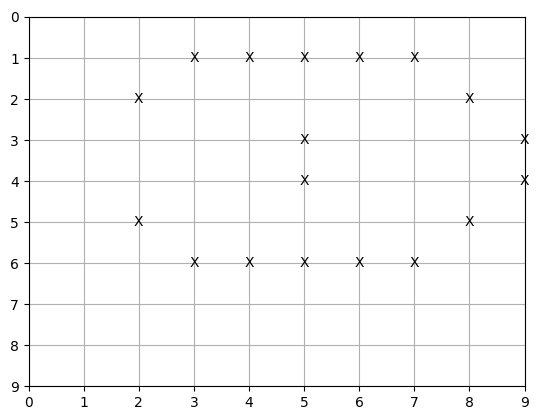

In [19]:
# Plot the coordinates on a 10x10 grid
grid_size = 10
grid = [[' ' for _ in range(grid_size)] for _ in range(grid_size)]

for row, col in list_of_cords:
    grid[row][col] = 'X'

fig, ax = plt.subplots()
ax.set_xticks(range(grid_size))
ax.set_yticks(range(grid_size))
ax.set_xticklabels(range(grid_size))
ax.set_yticklabels(range(grid_size))
ax.invert_yaxis()

# Plot each cell
for row in range(grid_size):
    for col in range(grid_size):
        ax.text(col, row, grid[row][col], va='center', ha='center')

plt.grid(True)
plt.show()

In [20]:
# # Extract the response text correctly
# segments_text = response.choices[0].message.content.strip()

# # Function to parse segments text into a list of list of tuples
# def parse_segments(segments_text):
#     # Use ast.literal_eval to safely parse the string into a list of list of tuples
#     return ast.literal_eval(segments_text)

# # Parse the segments
# segments = parse_segments(segments_text)

# # Plot the segments on a 10x10 grid
# grid_size = 10
# fig, ax = plt.subplots()
# ax.set_xticks(range(grid_size))
# ax.set_yticks(range(grid_size))
# ax.set_xticklabels(range(grid_size))
# ax.set_yticklabels(range(grid_size))
# ax.invert_yaxis()

# # Plot each segment
# for segment in segments:
#     x_coords = [point[1] for point in segment]  # Extract x coordinates
#     y_coords = [point[0] for point in segment]  # Extract y coordinates
#     ax.plot(x_coords, y_coords, 'ro-', linewidth=2)  # 'ro-' means red color, round markers, solid line

# # Display the grid
# plt.grid(True)
# plt.show()